In [7]:
from data_processing_functions import *
from time import time

In [11]:
objects_to_test = ["AngleTubes","Ears","Conrods","Gameboys"]
validation_measures = ["f1","precision","recall","accuracy"]
csv_path = "/home/jens/masterData/AlgorithmTuner/TunedParameters/LR/BLGA_II_COMP_AlgorithmTunerData-data.csv"
df = pd.read_csv(csv_path, usecols = ["algName","objName","geName","tp","tn","fp","fn"]+validation_measures, dtype = {"algName":"category","objName":"category","geName":"category"})
df = df[df["objName"].isin(objects_to_test)]
df["objName"].cat.remove_unused_categories(inplace=True)

df =  df.groupby(["algName","objName"]).sum().reset_index()
df["precision"]=df["tp"]/(df["tp"]+df["fp"])
df["recall"]=df["tp"]/(df["tp"]+df["fn"])
df["f1"]=2*df["tp"]/(2*df["tp"]+df["fn"]+df["fp"])
df["accuracy"]=(df["tp"]+df["tn"])/(df["tp"]+df["tn"]+df["fp"]+df["fn"])
df[["precision","recall","f1","accuracy"]].fillna(0,inplace=True)
df

/home/jens/.virtualenvs/master/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/jens/.virtualenvs/master/lib/python3.8/site-packages/pandas/core/frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,algName,objName,tp,tn,fp,fn,precision,recall,accuracy,f1
0,BF,AngleTubes,65,196,15,284,0.812500,0.186246,0.466071,0.303030
1,BF,Conrods,92,238,17,133,0.844037,0.408889,0.687500,0.550898
2,BF,Ears,37,155,48,34,0.435294,0.521127,0.700730,0.474359
3,BF,Gameboys,41,105,18,27,0.694915,0.602941,0.764398,0.645669
4,BL,AngleTubes,320,88,123,29,0.722348,0.916905,0.728571,0.808081
5,BL,Conrods,208,161,94,17,0.688742,0.924444,0.768750,0.789374
6,BL,Ears,46,157,46,25,0.500000,0.647887,0.740876,0.564417
7,BL,Gameboys,62,47,76,6,0.449275,0.911765,0.570681,0.601942
8,BLGA,AngleTubes,320,99,112,29,0.740741,0.916905,0.748214,0.819462
9,BLGA,Conrods,196,194,61,29,0.762646,0.871111,0.812500,0.813278


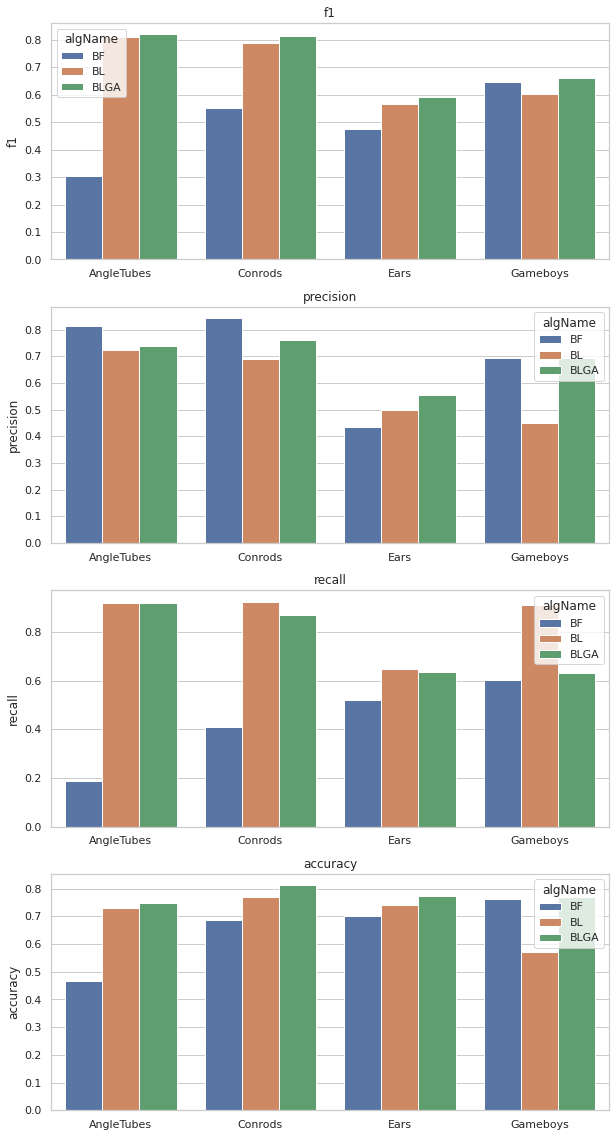

In [12]:

fig,axes = plt.subplots(len(validation_measures),1,figsize=(10,len(validation_measures)*5),sharey="row")
sns.set_theme(style="whitegrid")
for ax,vm in zip(axes,validation_measures):
    sns.barplot(x="objName",y=vm,hue="algName",data=df,ax=ax)
    ax.set_title(vm)
    ax.set_xlabel("")

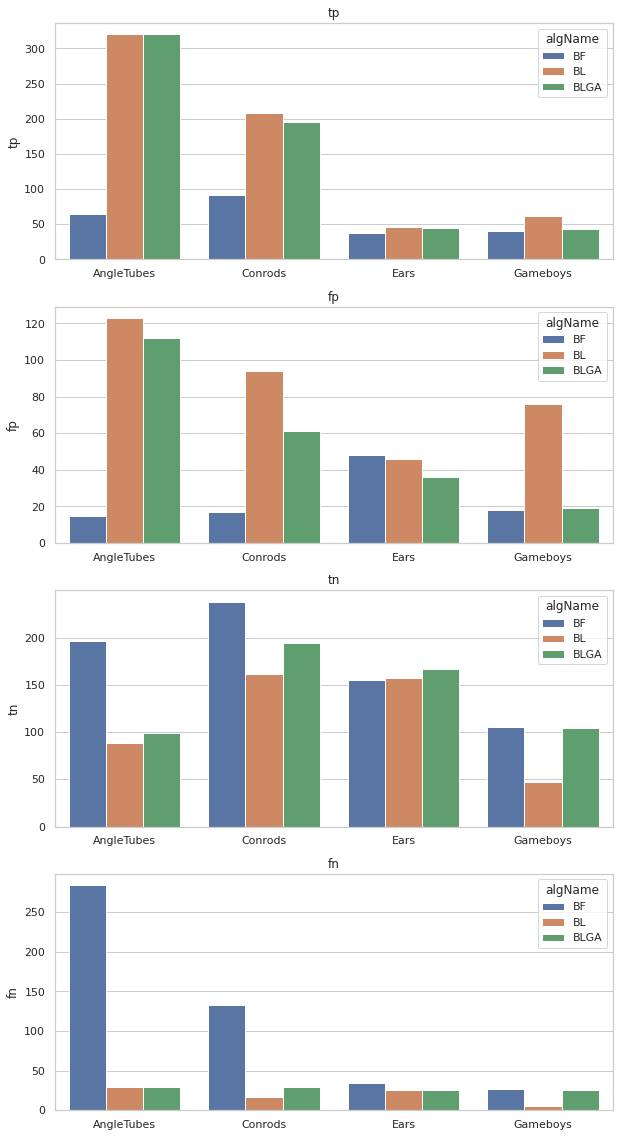

In [13]:

fig,axes = plt.subplots(len(validation_measures),1,figsize=(10,len(validation_measures)*5),sharey="row")
sns.set_theme(style="whitegrid")
for ax,vm in zip(axes,["tp","fp","tn","fn"]):
    sns.barplot(x="objName",y=vm,hue="algName",data=df,ax=ax)
    ax.set_title(vm)
    ax.set_xlabel("")
